<a href="https://colab.research.google.com/github/NILEG/TensorFlow/blob/main/006(Cat_vs_Dog_Kaggle_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

####Loading Data

In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-09-03 07:12:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   147MB/s    in 0.4s    

2023-09-03 07:12:04 (147 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [4]:
import os
train_cat=len(os.listdir('./cats_and_dogs_filtered/train/cats/'))
train_dog=len(os.listdir('./cats_and_dogs_filtered/train/dogs/'))
print(f"Train Cats: {train_cat} \nTrain Dogs: {train_dog}")

valid_cat=len(os.listdir('./cats_and_dogs_filtered/validation/cats/'))
valid_dog=len(os.listdir('./cats_and_dogs_filtered/validation/dogs/'))
print(f"Validation Cats: {valid_cat} \nValidation Dogs: {valid_dog}")

Train Cats: 1000 
Train Dogs: 1000
Validation Cats: 500 
Validation Dogs: 500


In [5]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
validation_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

training_data=train_generator.flow_from_directory("./cats_and_dogs_filtered/train", target_size=(150,150), batch_size=20, class_mode="binary")
validation_data=validation_generator.flow_from_directory("./cats_and_dogs_filtered/validation", target_size=(150,150), batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


####Making Model

In [6]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(150,150,3)),

                           tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu"),
                           tf.keras.layers.MaxPooling2D(strides=(2,2)),

                           tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
                           tf.keras.layers.MaxPooling2D(strides=(2,2)),

                           tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
                           tf.keras.layers.MaxPooling2D(strides=(2,2)),

                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=512, activation="relu"),
                           tf.keras.layers.Dense(units=1, activation="sigmoid")
                           ])
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss="binary_crossentropy", metrics=["accuracy"])
history=model.fit(training_data, epochs=15, validation_data=validation_data, verbose=1)

Epoch 1/15
100/100 [==============================] - 82s 792ms/step - loss: 0.7682 - accuracy: 0.5340 - val_loss: 0.6829 - val_accuracy: 0.5200
Epoch 2/15
100/100 [==============================] - 78s 783ms/step - loss: 0.6701 - accuracy: 0.6270 - val_loss: 0.6401 - val_accuracy: 0.6200
Epoch 3/15
100/100 [==============================] - 84s 838ms/step - loss: 0.5951 - accuracy: 0.7040 - val_loss: 0.5818 - val_accuracy: 0.6980
Epoch 4/15
100/100 [==============================] - 77s 765ms/step - loss: 0.5208 - accuracy: 0.7400 - val_loss: 0.5707 - val_accuracy: 0.7040
Epoch 5/15
100/100 [==============================] - 76s 764ms/step - loss: 0.4703 - accuracy: 0.7885 - val_loss: 0.6144 - val_accuracy: 0.7100
Epoch 6/15
100/100 [==============================] - 79s 795ms/step - loss: 0.3924 - accuracy: 0.8255 - val_loss: 0.6356 - val_accuracy: 0.7040
Epoch 7/15
100/100 [==============================] - 76s 764ms/step - loss: 0.3356 - accuracy: 0.8500 - val_loss: 0.5928 - val_ac

####Visualizing the history

In [8]:
print(history.history)

{'loss': [0.7682040929794312, 0.6701349020004272, 0.5950712561607361, 0.5207677483558655, 0.47033584117889404, 0.3924207091331482, 0.33557480573654175, 0.2596369683742523, 0.19317133724689484, 0.11367858946323395, 0.07955288887023926, 0.04937897250056267, 0.04773212969303131, 0.05874098837375641, 0.026745794340968132], 'accuracy': [0.5339999794960022, 0.6269999742507935, 0.7039999961853027, 0.7400000095367432, 0.7885000109672546, 0.8255000114440918, 0.8500000238418579, 0.8870000243186951, 0.9210000038146973, 0.9595000147819519, 0.9714999794960022, 0.9810000061988831, 0.984499990940094, 0.9860000014305115, 0.9925000071525574], 'val_loss': [0.682866632938385, 0.6401441097259521, 0.581771969795227, 0.570715069770813, 0.6144165992736816, 0.6355917453765869, 0.5928493142127991, 0.6664891242980957, 0.7375252842903137, 1.0114631652832031, 1.3660235404968262, 1.5681723356246948, 1.4540514945983887, 1.3790439367294312, 1.516555905342102], 'val_accuracy': [0.5199999809265137, 0.6200000047683716,

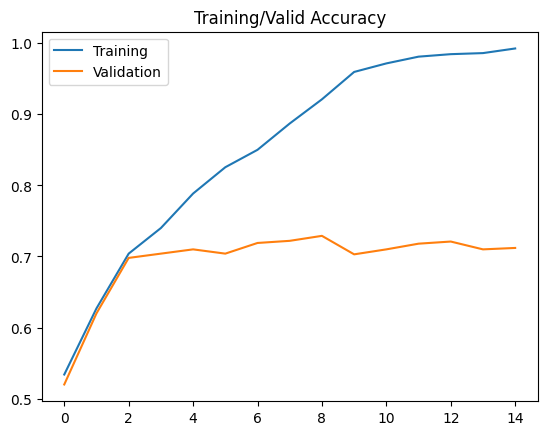

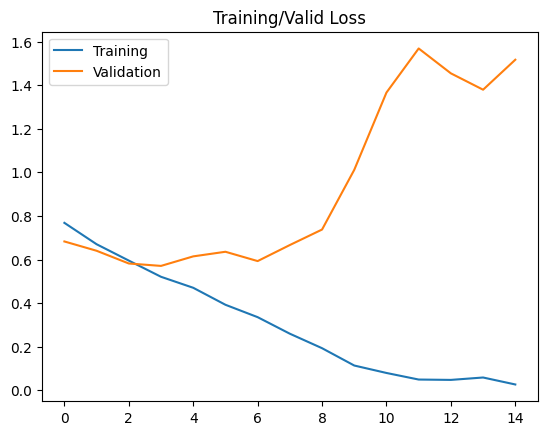

In [12]:
train_acc=history.history["accuracy"]
train_loss=history.history["loss"]

valid_acc=history.history["val_accuracy"]
valid_loss=history.history["val_loss"]

epoch=range(len(train_acc))

plt.plot(epoch, train_acc, label="Training")
plt.plot(epoch, valid_acc, label="Validation")
plt.title("Training/Valid Accuracy")
plt.legend()

plt.figure()
plt.plot(epoch, train_loss, label="Training")
plt.plot(epoch, valid_loss, label="Validation")
plt.title("Training/Valid Loss")
plt.legend()

####Results:
The model is Overfitting training data